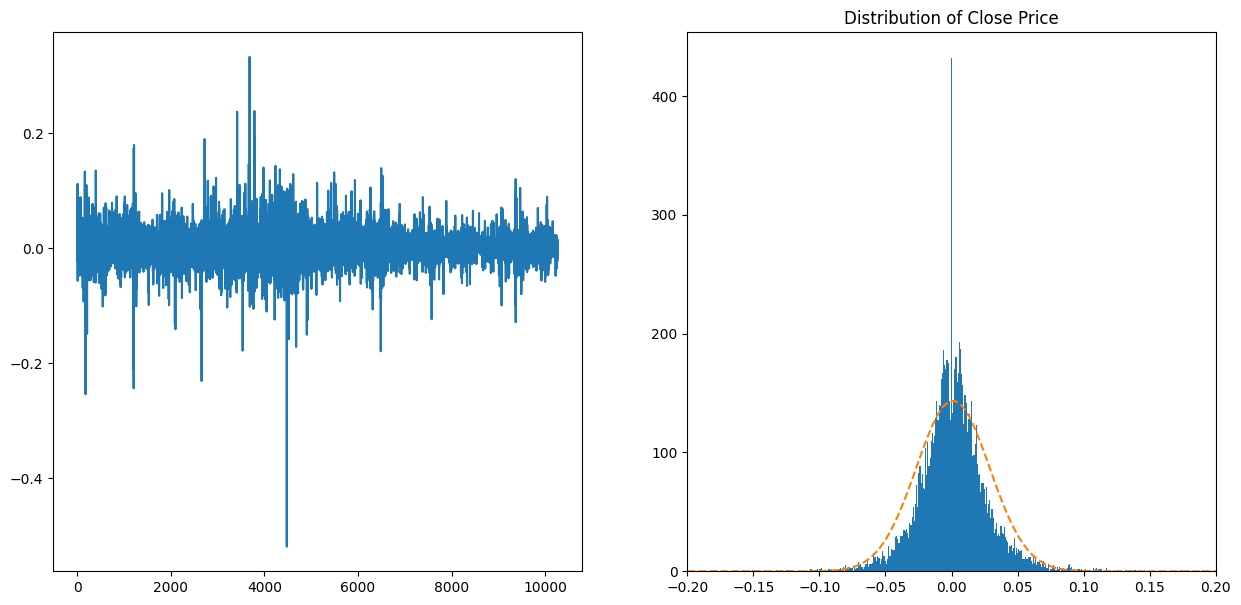

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Read the CSV file
data = pd.read_csv('../dataset/AAPL_diff_pct.csv')

# Plot the close pr
plt.figure(figsize=(15, 7))
axes1 = plt.subplot(1, 2, 1)
axes1.plot(data['Close'])

# plot the distribution of the close price
axes2 = plt.subplot(1, 2, 2)
axes2.hist(data['Close'], bins=1000)
# set min and max for x-axis
axes2.set_xlim([-.2, .2])

# draw gaussian distribution
mean = data['Close'].mean()
std = data['Close'].std()
x = np.linspace(-.2, .2, 100)
y = 1/(std * np.sqrt(2 * np.pi)) * np.exp(- (x - mean)**2 / (2 * std**2)) * 10
axes2.plot(x, y, '--')
axes2.set_title('Distribution of Close Price')
plt.show()

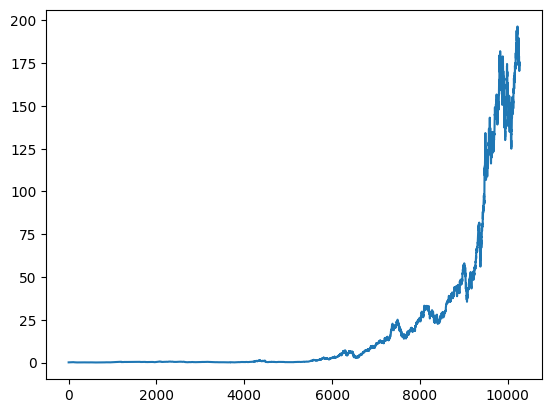

In [9]:

plt.plot(data['Close'])
plt.show()

/var/tmp/ipykernel_25876/294539629.py:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, model_data], ignore_index=True)


Text(0.5, 1.0, 'Relative Squared Error(RSE)')

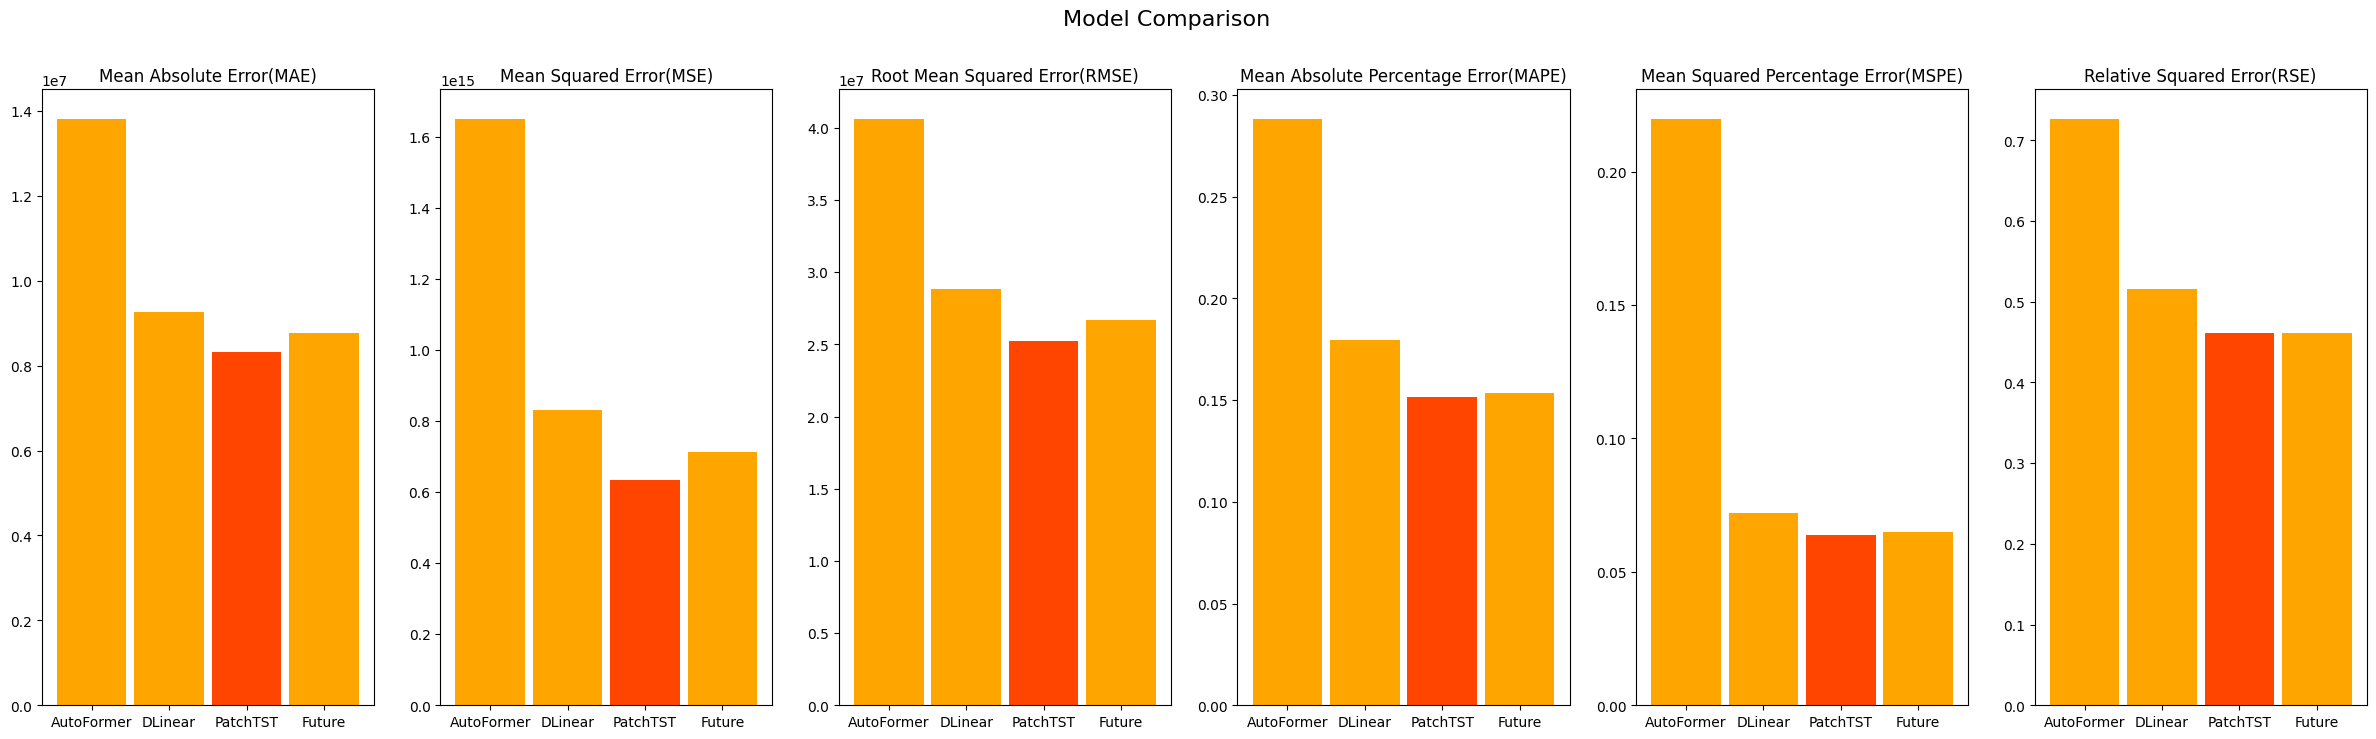

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

model_ids = {
    "AutoFormer": "AAPL_336_96_Autoformer_custom_ftM_sl336_ll48_pl96_dm128_nh16_el3_dl1_df256_fc1_ebtimeF_dtTrue_Exp_0",
    "DLinear": "AAPL_336_96_DLinear_custom_ftM_sl336_ll48_pl96_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0",
    "PatchTST": "AAPL_336_96_PatchTST_custom_ftM_sl336_ll48_pl96_dm128_nh16_el3_dl1_df256_fc1_ebtimeF_dtTrue_Exp_0",
    "Future": "AAPL_Future_336_96_PatchTST_custom_ftM_sl336_ll48_pl96_dm128_nh16_el3_dl1_df256_fc1_ebtimeF_dtTrue_Exp_0",
    "PCT_change": "AAPL_cumprod_336_96_PatchTST_custom_ftM_sl336_ll48_pl96_dm128_nh16_el3_dl1_df256_fc1_ebtimeF_dtTrue_Exp_0"
}


def getPath(model_id):
    return "../results/" + model_id + "/data/"


df = pd.DataFrame(columns=['model_id', 'mae', 'mse',
                  'rmse', 'mape', 'mspe', 'rse'])
colors = ['orange', 'orange', 'orangered']

for i, (model_name, model_id) in enumerate(model_ids.items()):
    data_path = getPath(model_id)
    metrics = np.load(data_path + "metrics.npy")

    model_data = pd.DataFrame({
        'model_name': model_name,
        'model_id': model_id,
        'mae': metrics[0],
        'mse': metrics[1],
        'rmse': metrics[2],
        'mape': metrics[3],
        'mspe': metrics[4],
        'rse': metrics[5]
    }, index=[i])

    df = pd.concat([df, model_data], ignore_index=True)


width = 0.9
r = np.arange(2)

fig = plt.figure(figsize=(30, 8))

fig.suptitle('Model Comparison', fontsize=16)

axes1 = plt.subplot(1, 6, 1)
axes2 = plt.subplot(1, 6, 2)
axes3 = plt.subplot(1, 6, 3)
axes4 = plt.subplot(1, 6, 4)
axes5 = plt.subplot(1, 6, 5)
axes6 = plt.subplot(1, 6, 6)

axes1.bar(df['model_name'], df['mae'], width=width, color=colors)
axes1.set_title('Mean Absolute Error(MAE)')

axes2.bar(df['model_name'], df['mse'], width=width, color=colors)
axes2.set_title('Mean Squared Error(MSE)')

axes3.bar(df['model_name'], df['rmse'], width=width, color=colors)
axes3.set_title('Root Mean Squared Error(RMSE)')

axes4.bar(df['model_name'], df['mape'], width=width, color=colors)
axes4.set_title('Mean Absolute Percentage Error(MAPE)')

axes5.bar(df['model_name'], df['mspe'], width=width, color=colors)
axes5.set_title('Mean Squared Percentage Error(MSPE)')

axes6.bar(df['model_name'], df['rse'], width=width, color=colors)
axes6.set_title('Relative Squared Error(RSE)')


# plt.show()

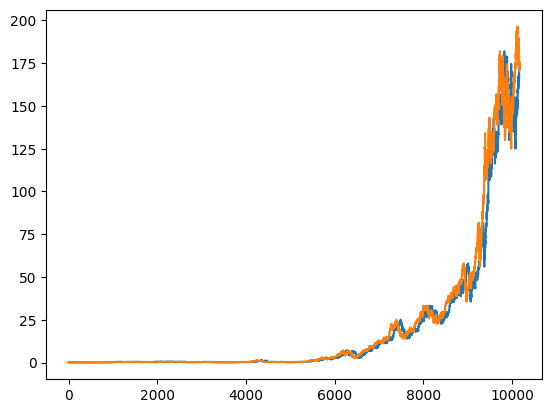

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('../dataset/AAPL.csv')

data["Open"] = data["Close"].shift(-96)
data = data.drop(data.tail(96).index)

plt.plot(data['Close'])
plt.plot(data['Open'])


# # Save to csv
data.to_csv('../dataset/AAPL_Future.csv', index=False)